# The Simpsons Classificator

So, today we're going to work with the Simpsons Dataset to teach our neural network how to classify the characters of this list:

In [1]:
list_of_heroes = ['abraham_grampa_simpson', 'agnes_skinner', 'apu_nahasapeemapetilon', 'barney_gumble',
                  'bart_simpson', 'carl_carlson', 'charles_montgomery_burns', 'chief_wiggum', 'cletus_spuckler',
                  'comic_book_guy', 'disco_stu', 'edna_krabappel', 'fat_tony', 'gil', 'groundskeeper_willie',
                  'homer_simpson', 'kent_brockman', 'krusty_the_clown', 'lenny_leonard', 'lionel_hutz', 'lisa_simpson',
                  'maggie_simpson', 'marge_simpson', 'martin_prince', 'mayor_quimby', 'milhouse_van_houten', 'miss_hoover',
                  'moe_szyslak', 'ned_flanders', 'nelson_muntz', 'otto_mann', 'patty_bouvier', 'principal_skinner',
                  'professor_john_frink', 'rainier_wolfcastle', 'ralph_wiggum', 'selma_bouvier', 'sideshow_bob', 'sideshow_mel',
                  'snake_jailbird', 'troy_mcclure', 'waylon_smithers']

print(f'Number of all classes: {len(list_of_heroes)}')

Number of all classes: 42


## *Main Libraries Installing:*

In [2]:
from torchvision import transforms, datasets
from torch.utils.data import DataLoader
from torch.optim import lr_scheduler
import matplotlib.pyplot as plt
from torch import optim
import torch.nn as nn
import numpy as np
import torch

## *Some information about the Dataset:*

To be honest, the real dataset truly belongs to this guy: https://www.kaggle.com/datasets/alexattia/the-simpsons-characters-dataset
But his version of the dataset is too unstable and some classes have so less images than others so our future ResNet won't be even able to notice them.

That's why the students of NSU has rebuilt this dataset so it's refreshed with more data: https://www.kaggle.com/datasets/bolg4rin/simpson-dataset-fixed

I just added some more pictures which were lost during their hard work so I posted it on hugging face:
https://huggingface.co/datasets/BodgeDook/Simpsons_Dataset_2025_remade/blob/main/simpsons_dataset_v2.rar

(if you have some problems or something doesn't work cuz' I've just recently started to learn these ml and dl important paltforms and sites (kaggle, hugging face, etc.) -> please, contact me on dmrzlobin@gmail.com)

## *Train dataset tensoring and standartization:*

First of all, we need to bring all our images to a tensor normalized form. The images in the dataset are in completely different dimensions, so we need to bring everything to a single average form. Let's take 256 by 256.

In fact, for the standard ResТet, the sizes are usually taken as 224 by 224 (Resnet18/34), but I decided to try to take 256 by 256, so as not to lose an important piece of information (again, the images in the dataset are not normalized, in some frames the image of the character's face can be at the very bottom or in the corner, and by cutting it immediately from, say, 512, to 224, you can lose 2/3 of the character's face. An exaggeration, but it can happen.)

But you always need to remember, that the more you take the image the more your computing resources of your video memory are spent.

In [3]:
preprocess = transforms.Compose([
    transforms.Resize(256), # adjusts the image to the desired size without losing information
    transforms.CenterCrop(256), # cut the central square of the image
    transforms.ToTensor(),
    transforms.Normalize(mean = [0.485, 0.456, 0.406], std = [0.229, 0.224, 0.225]) # standard values counted form ImageNet
])

train_dataset = datasets.ImageFolder(root = 'simpsons_dataset_v2/train/', transform = preprocess)

Now we can give our downloaded data to the Dataloder so it could easily be read by our future network:

In [4]:
train_dataloader = DataLoader(train_dataset, batch_size = 32, shuffle = True) # you can use bath = 64 or even 256 but do not forget about your GPU :)

`Let's check that all the classes are here:`

In [5]:
lst = train_dataset.classes
for i in range(len(lst)):
    print(f'{lst[i]} : class <{i}>\n')

abraham_grampa_simpson : class <0>

agnes_skinner : class <1>

apu_nahasapeemapetilon : class <2>

barney_gumble : class <3>

bart_simpson : class <4>

carl_carlson : class <5>

charles_montgomery_burns : class <6>

chief_wiggum : class <7>

cletus_spuckler : class <8>

comic_book_guy : class <9>

disco_stu : class <10>

edna_krabappel : class <11>

fat_tony : class <12>

gil : class <13>

groundskeeper_willie : class <14>

homer_simpson : class <15>

kent_brockman : class <16>

krusty_the_clown : class <17>

lenny_leonard : class <18>

lionel_hutz : class <19>

lisa_simpson : class <20>

maggie_simpson : class <21>

marge_simpson : class <22>

martin_prince : class <23>

mayor_quimby : class <24>

milhouse_van_houten : class <25>

miss_hoover : class <26>

moe_szyslak : class <27>

ned_flanders : class <28>

nelson_muntz : class <29>

otto_mann : class <30>

patty_bouvier : class <31>

principal_skinner : class <32>

professor_john_frink : class <33>

rainier_wolfcastle : class <34>



## *Random Converted Image visualization - Test:*

Let's see what our images have become. We can turn off RGB for now and look at the random results of our modification.

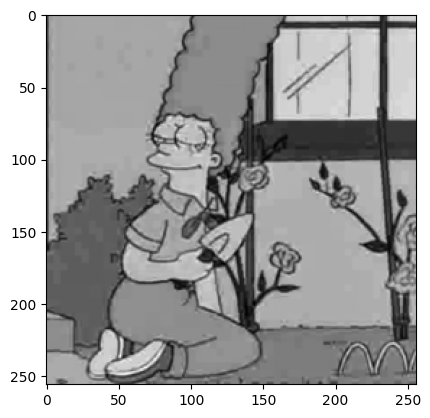

Image class: 22
One feature batch shape: torch.Size([32, 3, 256, 256])
One label batch shape: torch.Size([32])


In [7]:
train_features, train_labels = next(iter(train_dataloader))

current_image, current_label = train_features[0].mean(dim = 0).squeeze(), train_labels[0]
plt.imshow(current_image, cmap = 'gray')
plt.show()
print(f'Image class: {current_label}')
print(f'One feature batch shape: {train_features.shape}')
print(f'One label batch shape: {train_labels.shape}')

In [8]:
# the abraham_simpson tensor example:
print(train_dataset[0][0])  # ['abraham_simpson'] tensor
print(train_dataset[0][1]) #  ['abraham_simpson'] -> label ('0')

tensor([[[-0.9534, -1.2445, -1.2445,  ...,  0.3138,  0.3309,  0.2282],
         [-1.0562, -1.2103, -1.1247,  ...,  0.2967,  0.3481,  0.2282],
         [-1.1760, -1.1760, -0.9363,  ...,  0.3138,  0.3481,  0.2453],
         ...,
         [ 0.1768,  0.0741,  0.0569,  ...,  1.7009,  1.7009,  1.7009],
         [ 0.3481,  0.1768,  0.0398,  ...,  1.7009,  1.7009,  1.7009],
         [ 0.2624,  0.1597,  0.1083,  ...,  1.7009,  1.7009,  1.7009]],

        [[-0.5126, -0.8452, -0.8452,  ...,  0.4153,  0.4328,  0.3627],
         [-0.6001, -0.8102, -0.7227,  ...,  0.3978,  0.4503,  0.3627],
         [-0.7402, -0.7752, -0.5301,  ...,  0.4153,  0.4503,  0.3803],
         ...,
         [ 0.1702,  0.1176,  0.0476,  ...,  1.0455,  1.0455,  1.0455],
         [ 0.2752,  0.1877, -0.0049,  ...,  1.0455,  1.0455,  1.0455],
         [ 0.1352,  0.1352,  0.0651,  ...,  1.0455,  1.0455,  1.0455]],

        [[ 0.6356,  0.3219,  0.3219,  ...,  1.3328,  1.3502,  1.2282],
         [ 0.5485,  0.3568,  0.4439,  ...,  1

## ***ResNet Architechture Realization:***

Before we start to build our ResNet (I'll remind you, that 'ResNet' name means 'Residual Neural Network'), firstly, we need to understand what the device is going to be used while model learning. If your video card supports ***'cuda'*** than you can simply give all the calculations. Otherwise your CPU is going to suffer so much:)

In [31]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


Great, now there'll be some theory about the ResNets' work:

## ***Some info about CNN: work*** ##

![Sample Image](https://cdn.analyticsvidhya.com/wp-content/uploads/2020/10/90650dnn2.webp)

The essence of CNN is largely intuitive: we need to run the image through all layers of the network, each of which will analyze individual features of the image. The layers contain convolution kernels (filters). They gradually pass through the entire image (at the same time, one core passes through all the channels of the image at once), then they summarize the features and transfer them to the next layer. Thus, the first layers can consider purely "general" features of the image (for example, all kinds of corners, backgrounds, or just all kinds of lines), and the next two layers will receive more processed data.

We always use the inner parameters of every convolutional layer like inner_channels, outer_channels, stride, padding and bias. That's how the image's size changes after the conv. layer work:

$$
W_{\text{out}} = \frac{W_{\text{in}} - K + 2P}{S} + 1
$$

$$
H_{\text{out}} = \frac{H_{\text{in}} - K + 2P}{S} + 1
$$

It would seem that everything is fine: the image goes through layers, and then on the last fully connected Softmax layer (for example), the transmitted tensor is served fully processed, and thus the classification for the neural network of such a result will be much easier and better.
But the problems start when the neural network requires more computing power, more processing of the output information and better accuracy, which, in turn, requires even more layers. However, let's look at training such a network:

Let's consider a neural network with a sigmoid activation function:

$$
\sigma(x) = \frac{1}{1 + e^{-x}}
$$

Its derivative:

$$
\sigma'(x) = \sigma(x) \cdot (1 - \sigma(x))
$$

The maximum value of the sigmoid derivative is 0.25, which occurs when sigma(x) = 0.5. However, for large or small values of x, the derivative tends to zero, which leads to attenuation of the gradients.

Consider a neural network consisting of successive layers with a sigmoid activation function. Let the loss function L(y) be the mean square error (MSE):

$$
L(y) = (y - \hat{y})^2
$$

where 'y' is the true value, 'hat(y)' is the predicted value.

Let us denote:
- u_d is the input value of the neuron at the layer d;
- w_d is the weight of the neuron at the layer d;
- y is the output signal of the last layer.

Let us calculate the partial derivative of the loss function with respect to the weight w_d:

$$
\frac{\partial L(y)}{\partial w_d} = \frac{\partial L(y)}{\partial y} \cdot \frac{\partial y}{\partial w_d}
$$

Let's look at each component:

$$
\frac{\partial L(y)}{\partial y} = 2(y - \hat{y})
$$

$$
\frac{\partial y}{\partial w_d} = \sigma'(w_d u_d) \cdot u_d
$$

Then:

$$
\frac{\partial L(y)}{\partial w_d} = 2(y - \hat{y}) \cdot \sigma'(w_d u_d) \cdot u_d
$$

Since the maximum value of the sigmoid(x) = 0.25, we get:

$$
\frac{\partial L(y)}{\partial w_d} \leq 2(y - \hat{y}) \cdot 0.25 \cdot u_d
$$

Let's consider the derivative with respect to the weight of the previous layer w_d-1:

$$
\frac{\partial L(y)}{\partial w_{d-1}} = \frac{\partial L(y)}{\partial y} \cdot \frac{\partial y}{\partial w_{d-1}}
$$

$$
\frac{\partial L(y)}{\partial w_{d-1}} \leq 2(y - \hat{y}) \cdot (0.25)^2 \cdot u_d \cdot u_{d-1}
$$

We can easily see that if we continue to "dig deep", then in the end there will be almost nothing left of our gradient in the last layers, since it will decrease exponentially. Of course, in this case it would be logical to simply change one activation function to another, for example, sigmoid(x) will be changed to ReLU(x) function ***[ReLU(x) = max(0, x)]***. However, if some neuron gives only negative values to the input of the next layer, then the ReLU(x) will return only 0, and the derivative in this case will also be zero. That is, such a neuron will be considered "dead", because it does not affect the information processing process in any way, nor is it trained. What to do then?

## *The Answer: Resudual Blocks:* ##

Define the residual block: y = F(x) + x
$$
y = F(x) + x
$$

where F(x) — residual funcion which we want to minimize and x — inner tensor.

Compute the derivative of y with respect to x
$$
\frac{dy}{dx} = \frac{dF(x)}{dx} + I,
$$
where I — identity matrix.

Explanation: Even if the derivative of F(x) is small, the identity matrix ensures that the gradient does not vanish.
$$
\frac{dy}{dx} \geq I.
$$

Backpropagation: calculating the gradient through the residual block. In backpropagation, let the error at the output of the block be: $$\frac{\partial L}{\partial y}$$

Then the error at the input of the block is calculated by the chain differentiation rule:

$$
\frac{\partial L}{\partial x} = \frac{\partial L}{\partial y} \left( \frac{dF(x)}{dx} + I \right).
$$

If the derivative of F(x) with respect to x is small, then the main contribution to the gradient is given by the identity matrix, and we obtain:
$$
\frac{\partial L}{\partial x} \approx \frac{\partial L}{\partial y}.
$$

Conclusion: Residual blocks provide a direct gradient path, avoiding exponential decay.

![Sample Image](https://neerc.ifmo.ru/wiki/images/f/f7/Residual.png)

Now when we understood the main idea, let's try to build such a network and we're going to start from the Residual Block making:

## *ResNet's Residual Block:* ##

In [29]:
# Residual Block:

class ResidualBlock(nn.Module):
    def __init__(self, in_channels, out_channels, stride = 1, downsample = None):
        super(ResidualBlock, self).__init__()
        self.conv1 = nn.Sequential(
                    nn.Conv2d(in_channels, out_channels, kernel_size = 3, stride = stride, padding = 1, bias = False),
                    nn.BatchNorm2d(out_channels),
                    nn.ReLU(inplace = True))
        self.conv2 = nn.Sequential(
                    nn.Conv2d(out_channels, out_channels, kernel_size = 3, stride = 1, padding = 1, bias = False),
                    nn.BatchNorm2d(out_channels))
        self.downsample = downsample
        self.relu = nn.ReLU(inplace = True)

    def forward(self, x):
        residual = x
        first_out = self.conv1(x)
        second_out = self.conv2(first_out)
        if self.downsample is not None:
            residual = self.downsample(x)
        second_out += residual

        final_result = self.relu(second_out)
        return final_result

Then let's make the RNN itself now:

## *Residual Neural Network:* ##

In [30]:
# The Main ResNet architecture:

class ResNet(nn.Module):
    def __init__(self, ResidualBlock, layers, num_classes):
        super(ResNet, self).__init__()
        
        self.inplanes = 64
        self.conv1 = nn.Sequential(
                    nn.Conv2d(3, 64, kernel_size = 7, stride = 2, padding = 3, bias = False),
                    nn.BatchNorm2d(64),
                    nn.ReLU(inplace = True))
        self.maxpool = nn.MaxPool2d(kernel_size = 3, stride = 2, padding = 1)
        
        self.layer1 = self._make_layer(ResidualBlock, 64, layers[0], stride = 1)
        self.layer2 = self._make_layer(ResidualBlock, 128, layers[1], stride = 2)
        self.layer3 = self._make_layer(ResidualBlock, 256, layers[2], stride = 2)
        self.layer4 = self._make_layer(ResidualBlock, 512, layers[3], stride = 2)
        self.avgpool = nn.AdaptiveAvgPool2d(1)

        self.outlayer = nn.Linear(512, num_classes, bias = False)

    def _make_layer(self, block, planes, num_of_ResidualBlocks, stride = 1):
        
        downsample = None
        if stride != 1 or self.inplanes != planes:
            downsample = nn.Sequential(
                        nn.Conv2d(self.inplanes, planes, kernel_size = 1, stride = stride, bias = False),
                        nn.BatchNorm2d(planes))
        layers = []
        layers.append(ResidualBlock(self.inplanes, planes, stride, downsample))
        self.inplanes = planes
        for i in range(1, num_of_ResidualBlocks):
            layers.append(block(self.inplanes, planes))

        return nn.Sequential(*layers)

    def forward(self, x):
        x = self.conv1(x)
        x = self.maxpool(x)
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)

        x = self.avgpool(x)
        x = torch.flatten(x, 1)
        x = self.outlayer(x)

        return x

And now let's train and test our model (don't forget about saving it!):

## *ResNet Model Training and Testing:* ##

In [12]:
num_classes = 42
epochs = 20
batch_size = 32
learning_rate = 1e-3

model = ResNet(ResidualBlock, [3, 4, 6, 3], num_classes).to(device)

# LossCriterion, Optimizer and Scheduler (for now in a simple view):
criterion = nn.CrossEntropyLoss()
optimizer = optim.AdamW(model.parameters(), weight_decay = 1e-5)
scheduler = lr_scheduler.OneCycleLR(optimizer, max_lr = learning_rate, steps_per_epoch = len(train_dataloader), epochs = epochs)

In [13]:
# training function:
def train_function(train_dataloader, model, loss_fn, optimizer, scheduler, epochs):
    
    model.train()
    batch_losses, epoch_losses = [], []

    for epoch in range(epochs):
        running_loss = 0.0
        for batch, (X, y) in enumerate(train_dataloader):
            images, labels = X.to(device), y.to(device)
            optimizer.zero_grad()
            
            # Compute prediction and loss:
            prediction = model(images)
            loss = loss_fn(prediction, labels)

            # Backpropagation:
            loss.backward()
            optimizer.step()
            scheduler.step()

            running_loss += loss.item()
            batch_losses.append(loss.item())

            if batch % 200 == 0:
                print(f"Epoch [{epoch + 1} / {epochs}], Batch [{batch + 1} / {len(train_dataloader)}], Loss: {loss.item():.5f}\n")
        
        avg_loss = running_loss / len(train_dataloader)
        epoch_losses.append(avg_loss)
        print(f'For the {epoch + 1} epoch the loss is about: {avg_loss:.5f}...')

    # Graphics building:
    plt.figure(figsize = (12, 6))

    # Loss among batches:
    plt.subplot(1, 2, 1)
    plt.plot(batch_losses, label = "Loss per batch", color = "blue")
    plt.xlabel("Batch")
    plt.ylabel("Loss")
    plt.title("Training Loss per Batch")
    plt.grid(True)
    plt.legend()

    # Average Loss every epoch:
    plt.subplot(1, 2, 2)
    plt.plot(epoch_losses, label = "Average Loss per Epoch", color = "red")
    plt.xlabel("Epoch")
    plt.ylabel("Average Loss")
    plt.title("Training Loss per Epoch")
    plt.grid(True)
    plt.legend()

    plt.savefig("training_loss.png", dpi = 300, bbox_inches = 'tight')
    plt.show()

Epoch [1 / 20], Batch [1 / 660], Loss: 3.88060

Epoch [1 / 20], Batch [201 / 660], Loss: 2.01679

Epoch [1 / 20], Batch [401 / 660], Loss: 1.24264

Epoch [1 / 20], Batch [601 / 660], Loss: 0.99004

For the 1 epoch the loss is about: 1.72990...
Epoch [2 / 20], Batch [1 / 660], Loss: 1.15477

Epoch [2 / 20], Batch [201 / 660], Loss: 1.09672

Epoch [2 / 20], Batch [401 / 660], Loss: 1.43006

Epoch [2 / 20], Batch [601 / 660], Loss: 0.92326

For the 2 epoch the loss is about: 0.92197...
Epoch [3 / 20], Batch [1 / 660], Loss: 0.72781

Epoch [3 / 20], Batch [201 / 660], Loss: 0.43205

Epoch [3 / 20], Batch [401 / 660], Loss: 0.37773

Epoch [3 / 20], Batch [601 / 660], Loss: 0.66713

For the 3 epoch the loss is about: 0.74340...
Epoch [4 / 20], Batch [1 / 660], Loss: 0.47777

Epoch [4 / 20], Batch [201 / 660], Loss: 0.32375

Epoch [4 / 20], Batch [401 / 660], Loss: 0.56972

Epoch [4 / 20], Batch [601 / 660], Loss: 0.34108

For the 4 epoch the loss is about: 0.60763...
Epoch [5 / 20], Batch [1

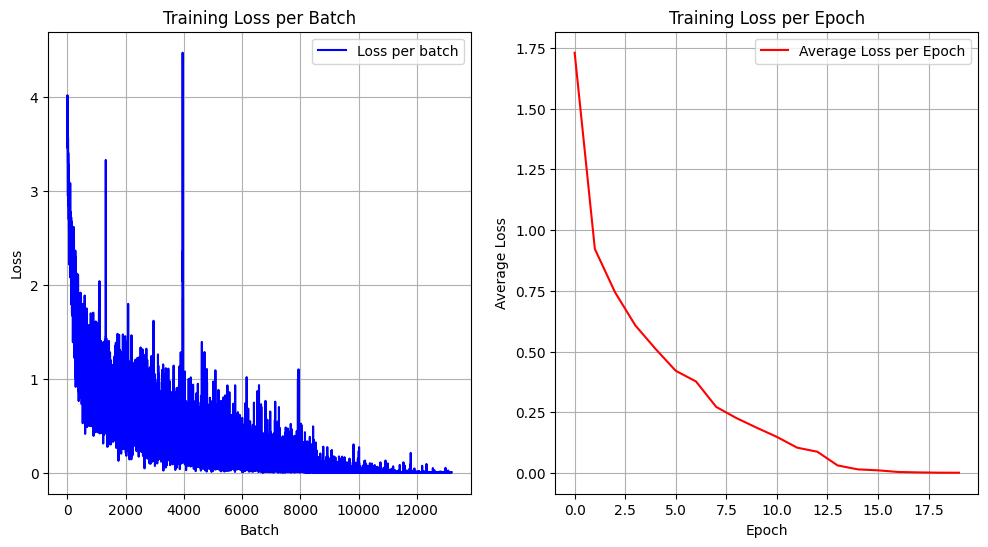

In [14]:
train_function(train_dataloader, model, criterion, optimizer, scheduler, epochs)
# Model Saving:
torch.save(model.state_dict(), "resnet_v2.pth")

Test Mode On:

In [33]:
model = ResNet(ResidualBlock, [3, 4, 6, 3], num_classes).to(device)
model.load_state_dict(torch.load("resnet_v2.pth"))

<All keys matched successfully>

In [34]:
model.eval()

ResNet(
  (conv1): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
  )
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): ResidualBlock(
      (conv1): Sequential(
        (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU(inplace=True)
      )
      (conv2): Sequential(
        (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (relu): ReLU(inplace=True)
    )
    (1): ResidualBlock(
      (conv1): Sequential(
        (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), pad

In [35]:
test_dataset = datasets.ImageFolder(root = 'simpsons_dataset_v2/test/', transform = preprocess)

In [36]:
test_dataloader = DataLoader(test_dataset, batch_size = 32, shuffle = False)

In [26]:
# test function:
def test_function(model, test_dataloader):

    correct, total = 0, 0    
    with torch.no_grad():
        for images, labels in test_dataloader:
            images, labels = images.to(device), labels.to(device)
            
            # Predictions:
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            
            # Count of the right answers:
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    
    accuracy = 100 * (correct / total)
    return accuracy

accuracy = test_function(model, test_dataloader)
print(f'Accuracy on the test set is about: {accuracy:.3f}%')

Accuracy on the test set is about: 93.636%


Wow! That's a pretty great result! But for the better understanding let's also calculate the models' recall and precision, too:

## *ResNet's Precision:* ##

abraham_grampa_simpson: 0.9167
agnes_skinner: 1.0000
apu_nahasapeemapetilon: 1.0000
barney_gumble: 0.7692
bart_simpson: 1.0000
carl_carlson: 1.0000
charles_montgomery_burns: 1.0000
chief_wiggum: 0.8462
cletus_spuckler: 1.0000
comic_book_guy: 0.9167
disco_stu: 1.0000
edna_krabappel: 0.9167
fat_tony: 1.0000
gil: 0.8571
groundskeeper_willie: 1.0000
homer_simpson: 0.9167
kent_brockman: 0.8462
krusty_the_clown: 0.7857
lenny_leonard: 1.0000
lionel_hutz: 0.9000
lisa_simpson: 1.0000
maggie_simpson: 1.0000
marge_simpson: 0.9167
martin_prince: 1.0000
mayor_quimby: 0.8462
milhouse_van_houten: 0.9167
miss_hoover: 0.8750
moe_szyslak: 0.9167
ned_flanders: 1.0000
nelson_muntz: 1.0000
otto_mann: 1.0000
patty_bouvier: 1.0000
principal_skinner: 0.7857
professor_john_frink: 1.0000
rainier_wolfcastle: 1.0000
ralph_wiggum: 1.0000
selma_bouvier: 1.0000
sideshow_bob: 0.8462
sideshow_mel: 1.0000
snake_jailbird: 1.0000
troy_mcclure: 0.8889
waylon_smithers: 1.0000


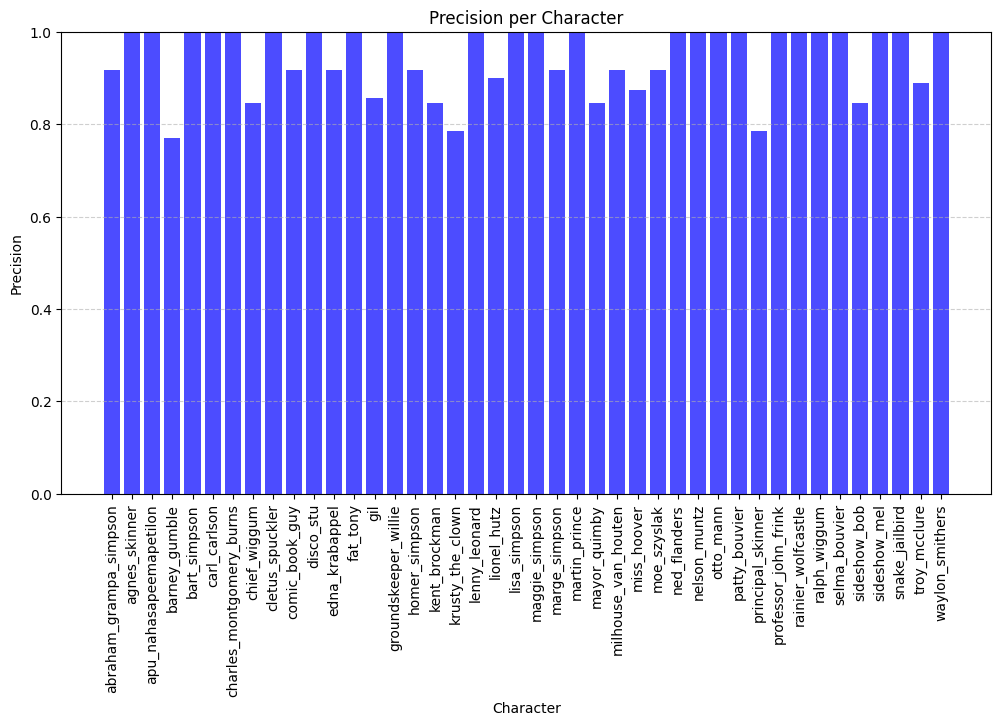

In [37]:
def precision_calculating(model, test_dataloader, device, num_classes):
    TP = np.zeros(num_classes) # True Positives
    FP = np.zeros(num_classes) # False Positives
    class_counts = np.zeros(num_classes) # each class's images count

    with torch.no_grad():
        for images, labels in test_dataloader:
            images, labels = images.to(device), labels.to(device)

            outputs = model(images)
            _, predicted = torch.max(outputs, 1)

            for i in range(len(labels)):
                class_counts[labels[i].item()] += 1

                if predicted[i] == labels[i]:  
                    TP[predicted[i].item()] += 1
                else:
                    FP[predicted[i].item()] += 1

    precision = np.divide(TP, TP + FP, out = np.zeros_like(TP), where = (TP + FP) != 0) # to avoid dividing by zero
    return precision

precision_scores = precision_calculating(model, test_dataloader, device, len(list_of_heroes))

# Printing precision for each hero:
for hero, score in zip(list_of_heroes, precision_scores):
    print(f'{hero}: {score:.4f}')

# Plotting precision for each hero (diagram):
plt.figure(figsize = (12, 6))
plt.bar(list_of_heroes, precision_scores, color = 'blue', alpha = 0.7)
plt.xlabel("Character")
plt.ylabel("Precision")
plt.title("Precision per Character")
plt.xticks(rotation = 90) # rotating the heroes' names (cuz theu're too large for the output image)
plt.ylim(0, 1)  # Precision is between 0 and 1
plt.grid(axis = 'y', linestyle = '--', alpha = 0.6)

plt.savefig("precision_per_character.png", dpi = 300, bbox_inches = 'tight')
plt.show()

Not bad at all :) (but you **need** to remember - some of classes are small so the results like these are not so unpredictable if to think...

Now let's calculate the model's recall!

## *ResNet's Recall:* ##

abraham_grampa_simpson: 1.0000
agnes_skinner: 0.6000
apu_nahasapeemapetilon: 1.0000
barney_gumble: 1.0000
bart_simpson: 1.0000
carl_carlson: 1.0000
charles_montgomery_burns: 1.0000
chief_wiggum: 1.0000
cletus_spuckler: 0.9000
comic_book_guy: 1.0000
disco_stu: 0.7000
edna_krabappel: 1.0000
fat_tony: 0.8000
gil: 0.6000
groundskeeper_willie: 1.0000
homer_simpson: 1.0000
kent_brockman: 1.0000
krusty_the_clown: 1.0000
lenny_leonard: 1.0000
lionel_hutz: 0.9000
lisa_simpson: 1.0000
maggie_simpson: 1.0000
marge_simpson: 1.0000
martin_prince: 1.0000
mayor_quimby: 1.0000
milhouse_van_houten: 1.0000
miss_hoover: 0.7000
moe_szyslak: 1.0000
ned_flanders: 1.0000
nelson_muntz: 1.0000
otto_mann: 0.7000
patty_bouvier: 1.0000
principal_skinner: 1.0000
professor_john_frink: 1.0000
rainier_wolfcastle: 0.7000
ralph_wiggum: 1.0000
selma_bouvier: 1.0000
sideshow_bob: 1.0000
sideshow_mel: 0.8000
snake_jailbird: 1.0000
troy_mcclure: 0.8000
waylon_smithers: 1.0000


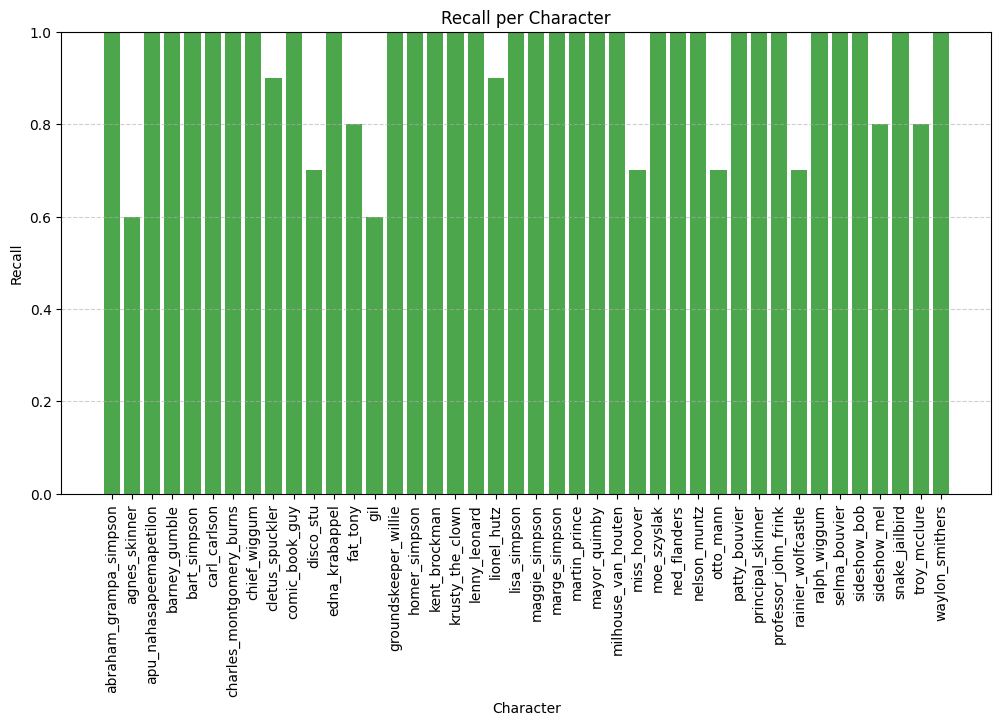

In [38]:
import matplotlib.pyplot as plt
import numpy as np

def recall_function(model, test_dataloader, device, num_classes):
    TP = np.zeros(num_classes)  # True Positives
    FN = np.zeros(num_classes)  # False Negatives
    class_counts = np.zeros(num_classes)  # each class's images count

    with torch.no_grad():
        for images, labels in test_dataloader:
            images, labels = images.to(device), labels.to(device)

            outputs = model(images)
            _, predicted = torch.max(outputs, 1)

            for i in range(len(labels)):
                class_counts[labels[i].item()] += 1

                if predicted[i] == labels[i]:
                    TP[predicted[i].item()] += 1
                else:
                    FN[labels[i].item()] += 1

    recall = np.divide(TP, TP + FN, out=np.zeros_like(TP), where=(TP + FN) != 0)  # to avoid dividing by zero
    return recall

# Call your recall calculation function
recall_scores = recall_function(model, test_dataloader, device, len(list_of_heroes))

# Printing recall for each hero:
for hero, score in zip(list_of_heroes, recall_scores):
    print(f'{hero}: {score:.4f}')

# Plotting recall for each hero:
plt.figure(figsize = (12, 6))
plt.bar(list_of_heroes, recall_scores, color = 'green', alpha = 0.7)
plt.xlabel("Character")
plt.ylabel("Recall")
plt.title("Recall per Character")
plt.xticks(rotation = 90)
plt.ylim(0, 1)  # Recall is between 0 and 1
plt.grid(axis = 'y', linestyle = '--', alpha = 0.6)

plt.savefig("recall_per_character.png", dpi = 300, bbox_inches = 'tight')
plt.show()

Yap, that's nice (at least, I think so...)
Now, thanks a lot for the reading my notebook! Goodbye and good luck in everything!

In [25]:
# ...